In [ ]:
# Import required libraries and modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from recommender_pipeline.data_loader import StandardLoader
from recommender_pipeline.exploration import EDA, HTMLGenerator

# Spotify Music Dataset - Exploratory Data Analysis

This notebook performs comprehensive exploratory data analysis on the Spotify music dataset using our custom EDA pipeline.

In [ ]:
matched_artists = StandardLoader("../data/matched_artists.parquet").load().rename(columns={'right_spotify_id':'spotify_id'})
matched_artists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17632 entries, 0 to 17631
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   artist_id             17632 non-null  int64  
 1   name                  17632 non-null  object 
 2   spotify_id            14969 non-null  float64
 3   right_artist_name     14969 non-null  object 
 4   right_matched_artist  14969 non-null  object 
 5   right_match_score     14969 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 826.6+ KB


In [13]:
matched_artists.head()

,artist_id,name,spotify_id,right_artist_name,right_matched_artist,right_match_score
0,1,MALICE MIZER,NaN,None,None,NaN
1,2,Diary of Dreams,141558.0,Diary Of Dreams,Diary Of Dreams,100.0
2,3,Carpathian Forest,6398.0,Carpathian Forest,Carpathian Forest,100.0
3,4,Moi dix Mois,NaN,None,None,NaN
4,5,Bella Morte,133253.0,Bella Morte,Bella Morte,100.0


In [7]:
# Load the Spotify music dataset
spotify_df = StandardLoader(folder_path="../data/spotify_musics.parquet").load()
spotify_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3528311 entries, 0 to 3528310
Data columns (total 18 columns):
 #   Column            Dtype  
---  ------            -----  
 0   artist_name       object 
 1   track_name        object 
 2   popularity        float64
 3   duration_ms       int64  
 4   explicit          float64
 5   danceability      float64
 6   energy            float64
 7   key               int64  
 8   loudness          float64
 9   mode              int64  
 10  speechiness       float64
 11  acousticness      float64
 12  instrumentalness  float64
 13  liveness          float64
 14  valence           float64
 15  tempo             float64
 16  time_signature    int64  
 17  track_genre       object 
dtypes: float64(11), int64(4), object(3)
memory usage: 484.5+ MB


In [15]:
#matched data
df = matched_artists.dropna(subset=['spotify_id'])[['artist_id','name','right_artist_name']].rename(columns={'right_artist_name':'artist_name'}) \
.merge(spotify_df, on = "artist_name", how="inner")


In [18]:
df.to_parquet("../data/artists_spotify_matched_raw.parquet")

In [19]:
# Initialize EDA instance
print("Initializing EDA analysis...")
eda = EDA(df)

Initializing EDA analysis...


In [20]:
# Generate and print basic information about the dataset
basic_info = eda.basic_info(pretty_print=True)

📊 DATASET OVERVIEW
📐 Shape: 1,108,570 rows × 20 columns
💾 Memory Usage: 434,418,796 bytes (414.29 MB)
🔍 Duplicate Rows: 0
❓ Total Missing Values: 2,450,589 (11.05%)

📋 COLUMN DETAILS
Column Name               Data Type       Missing  Missing % 
------------------------------------------------------------
artist_id                 int64           0        0.0       
name                      object          0        0.0       
artist_name               object          0        0.0       
track_name                object          2        0.0       
popularity                float64         686514   61.9      
duration_ms               int64           0        0.0       
explicit                  float64         1077559  97.2      
danceability              float64         0        0.0       
energy                    float64         0        0.0       
key                       int64           0        0.0       
loudness                  float64         0        0.0       
mode        

📊 Found missing values in 4 columns


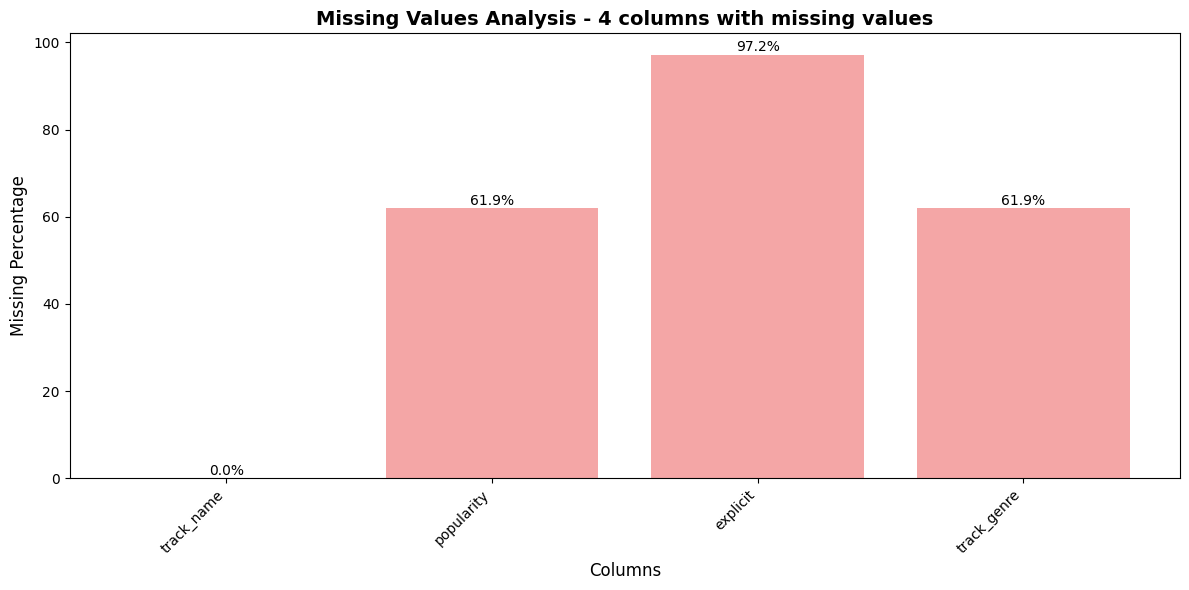

In [21]:
# Analyze missing values
missing_fig = eda.missing_values_analysis()
if missing_fig:
    plt.show()
else:
    print("🎉 No missing values found in the dataset!")

📊 Created distribution plots for 16 columns


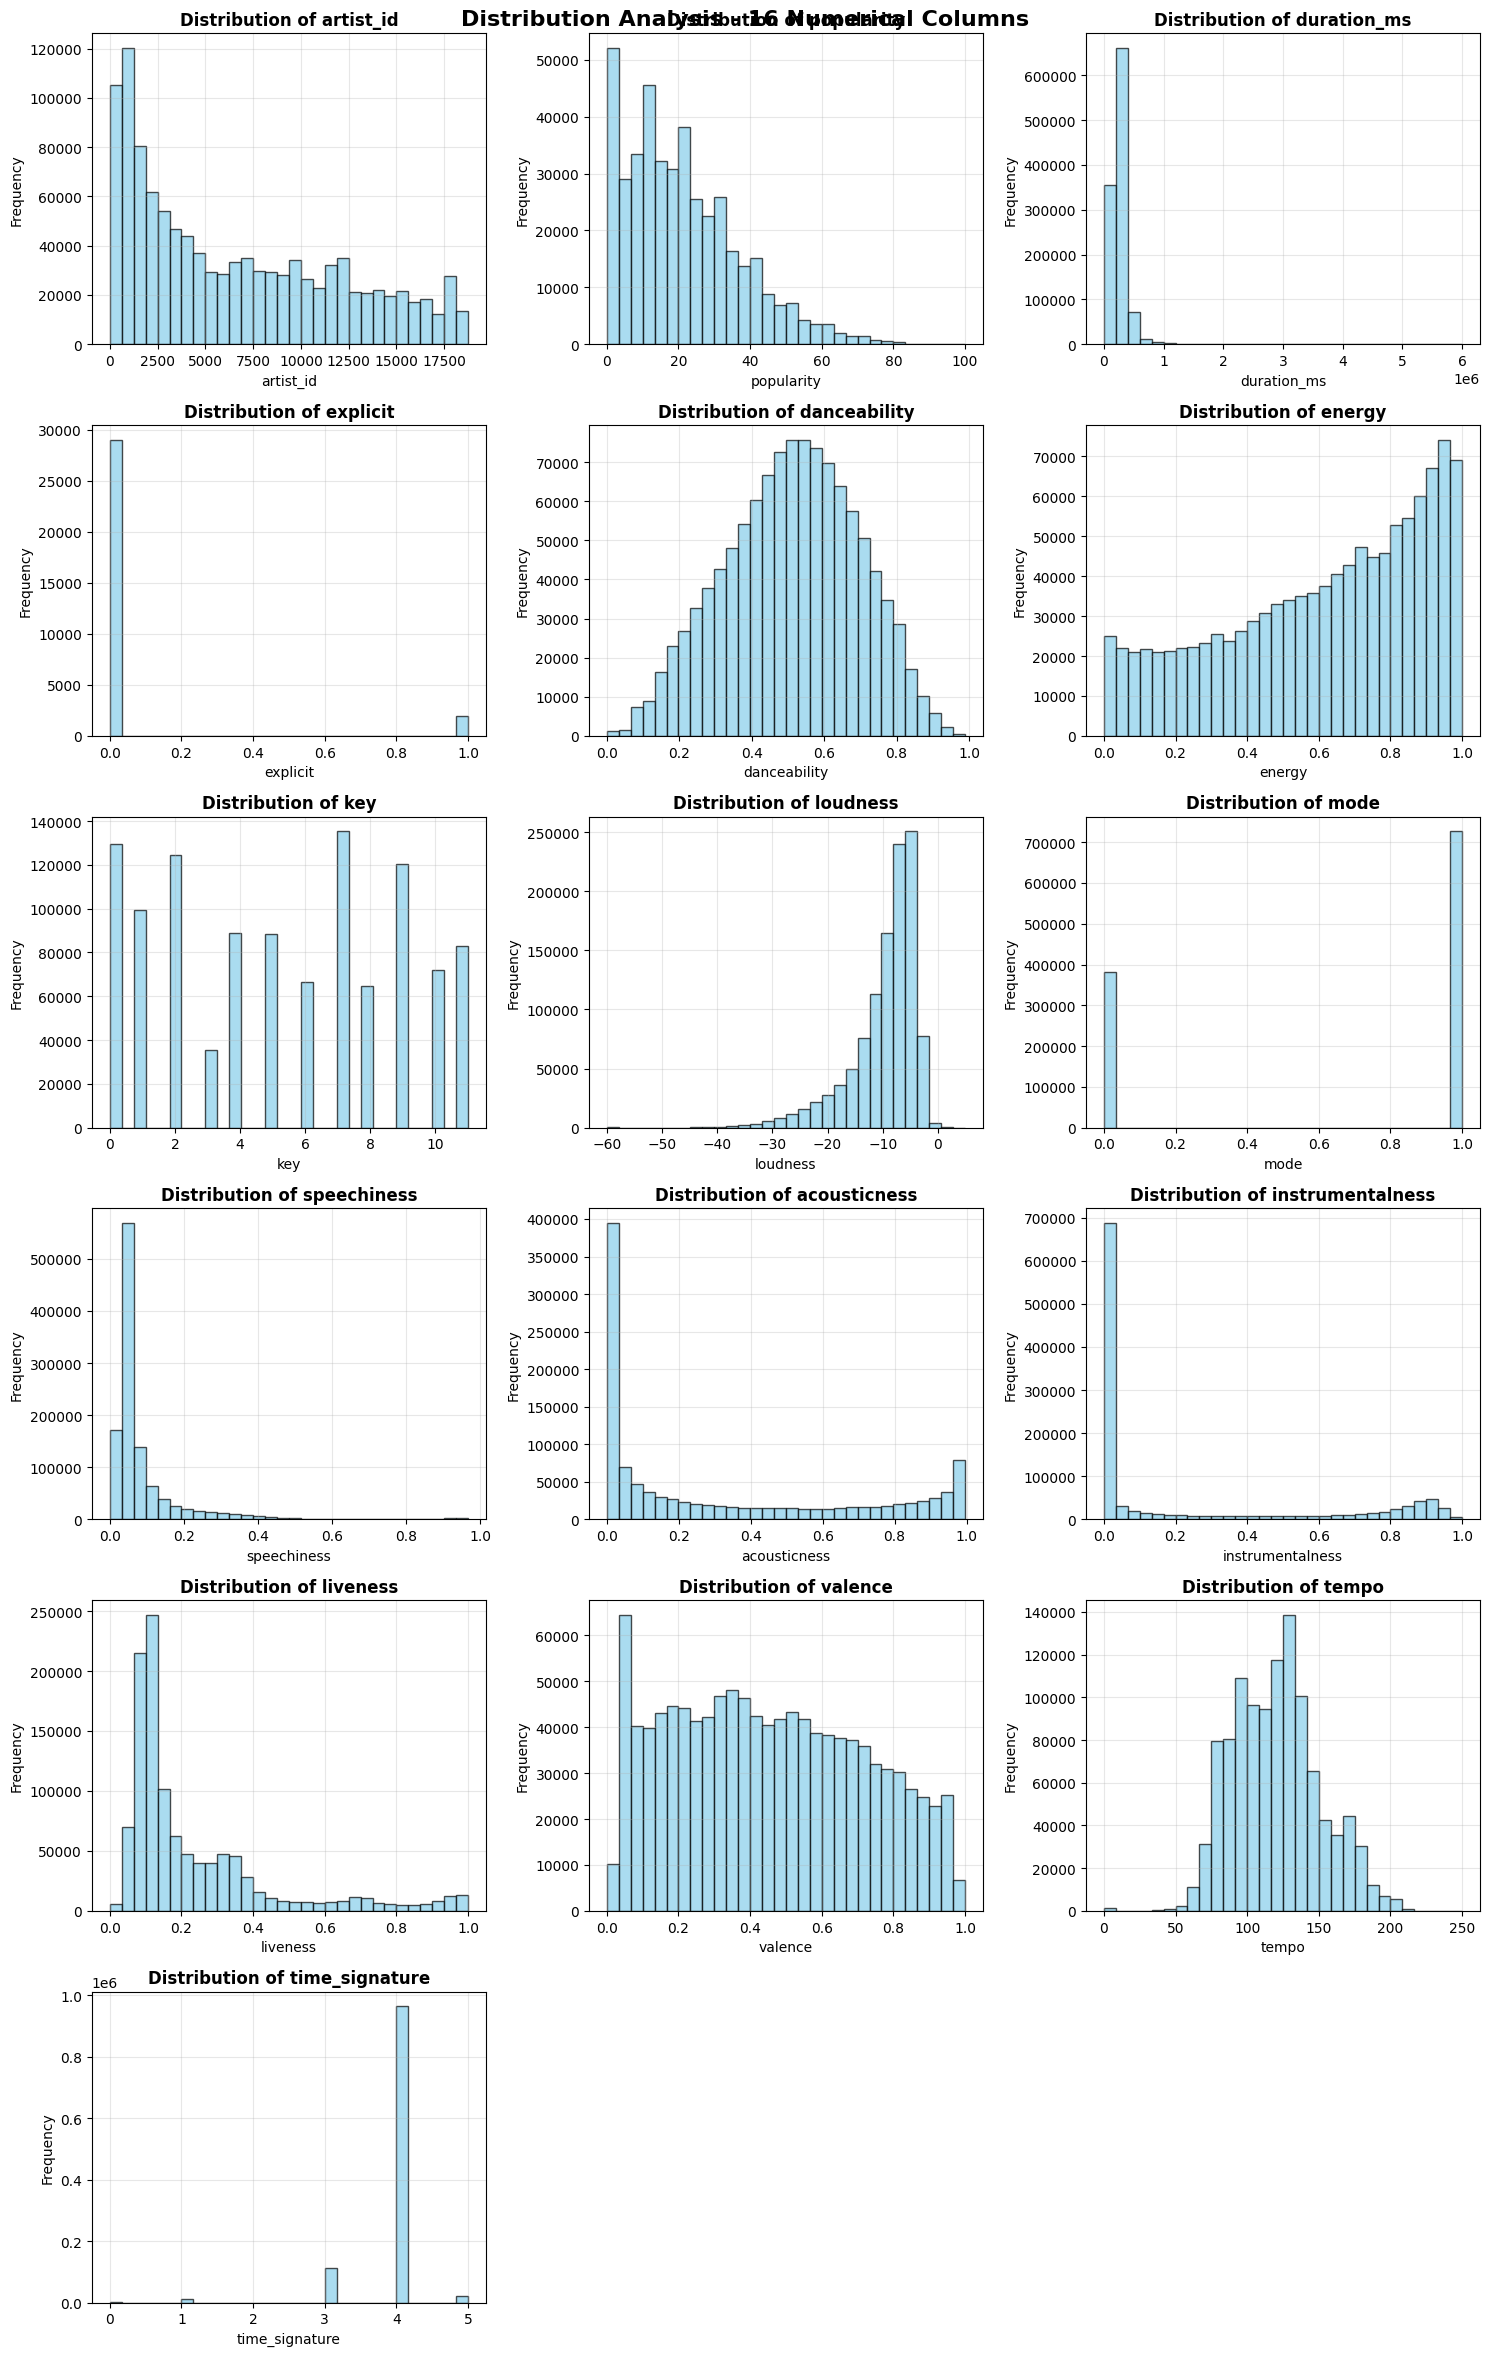

In [22]:
# Create distribution analysis
dist_fig = eda.distribution_analysis()
if dist_fig:
    plt.show()
else:
    print("No numerical columns found for distribution analysis.")

📊 Created categorical plots for 4 columns


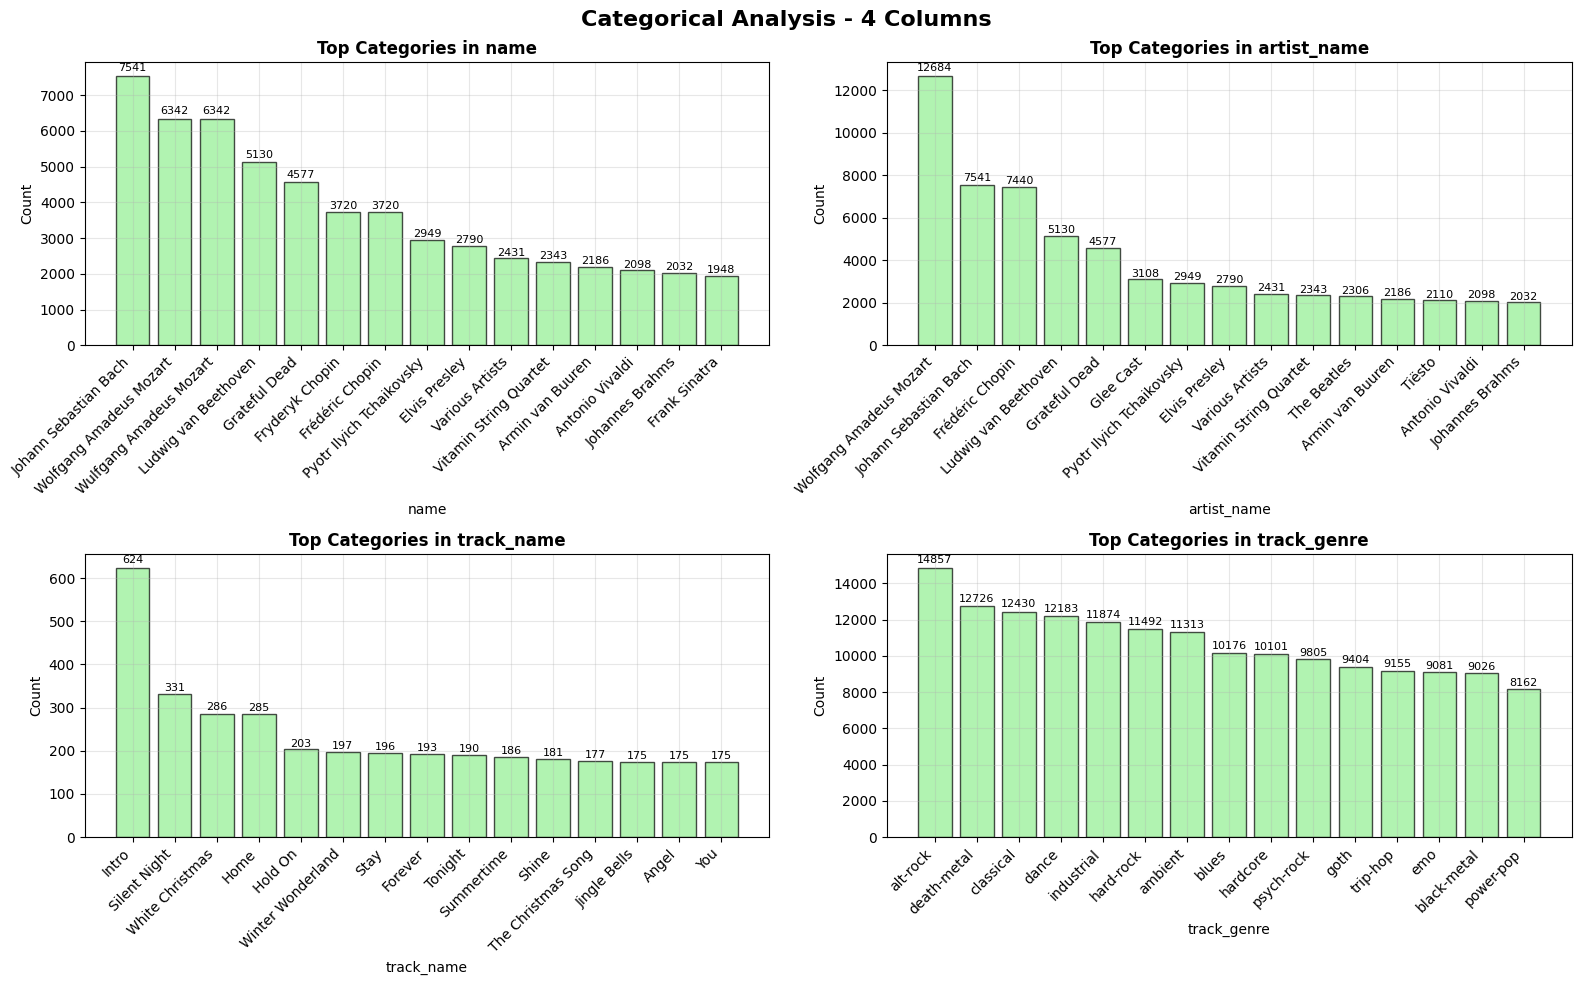

In [23]:
# Analyze categorical variables
cat_fig = eda.categorical_analysis()
if cat_fig:
    plt.show()
else:
    print("No categorical columns found for analysis.")

📊 Created correlation heatmap for 16 columns


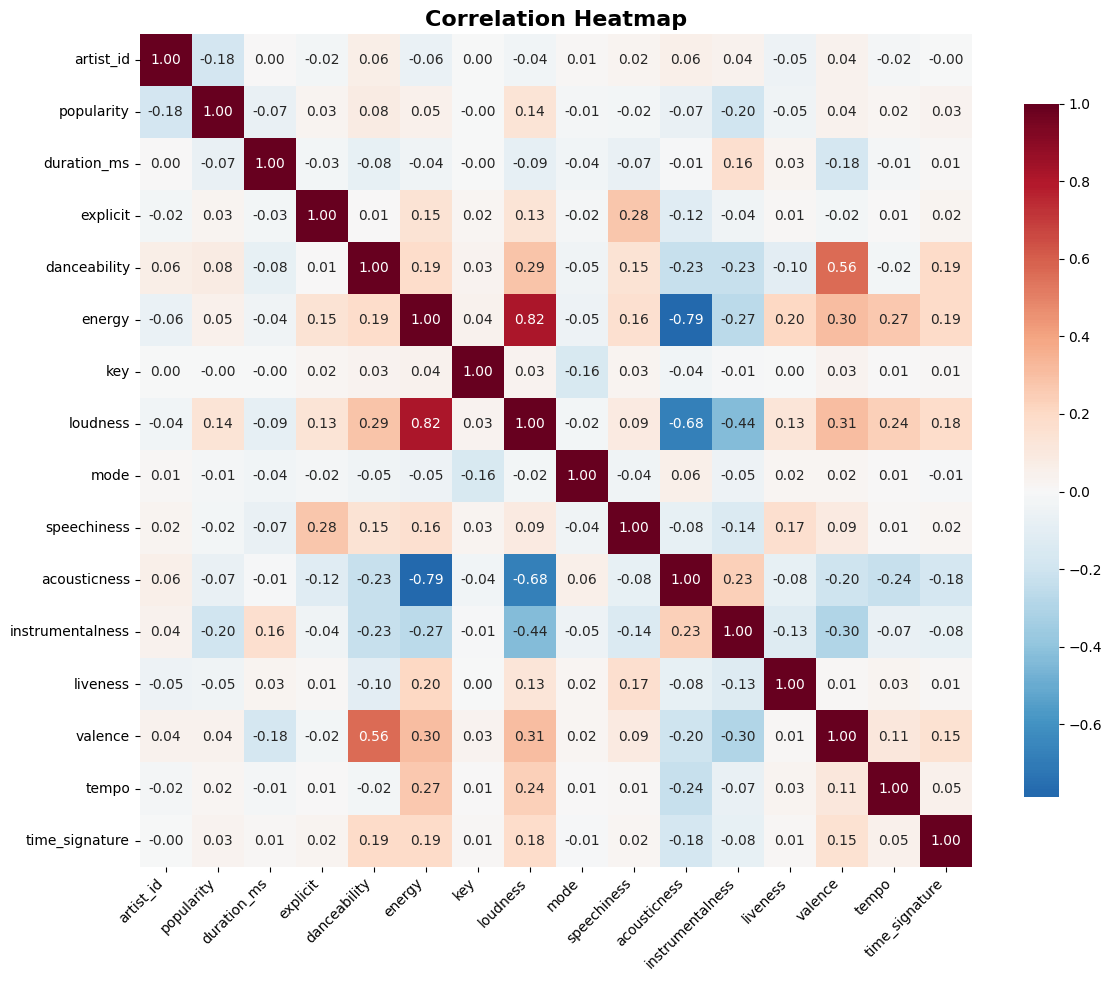

In [24]:
# Create correlation heatmap
corr_fig = eda.correlation_heatmap()
if corr_fig:
    plt.show()
else:
    print("Need at least 2 numerical columns for correlation analysis.")

📊 Created outlier analysis for 16 columns


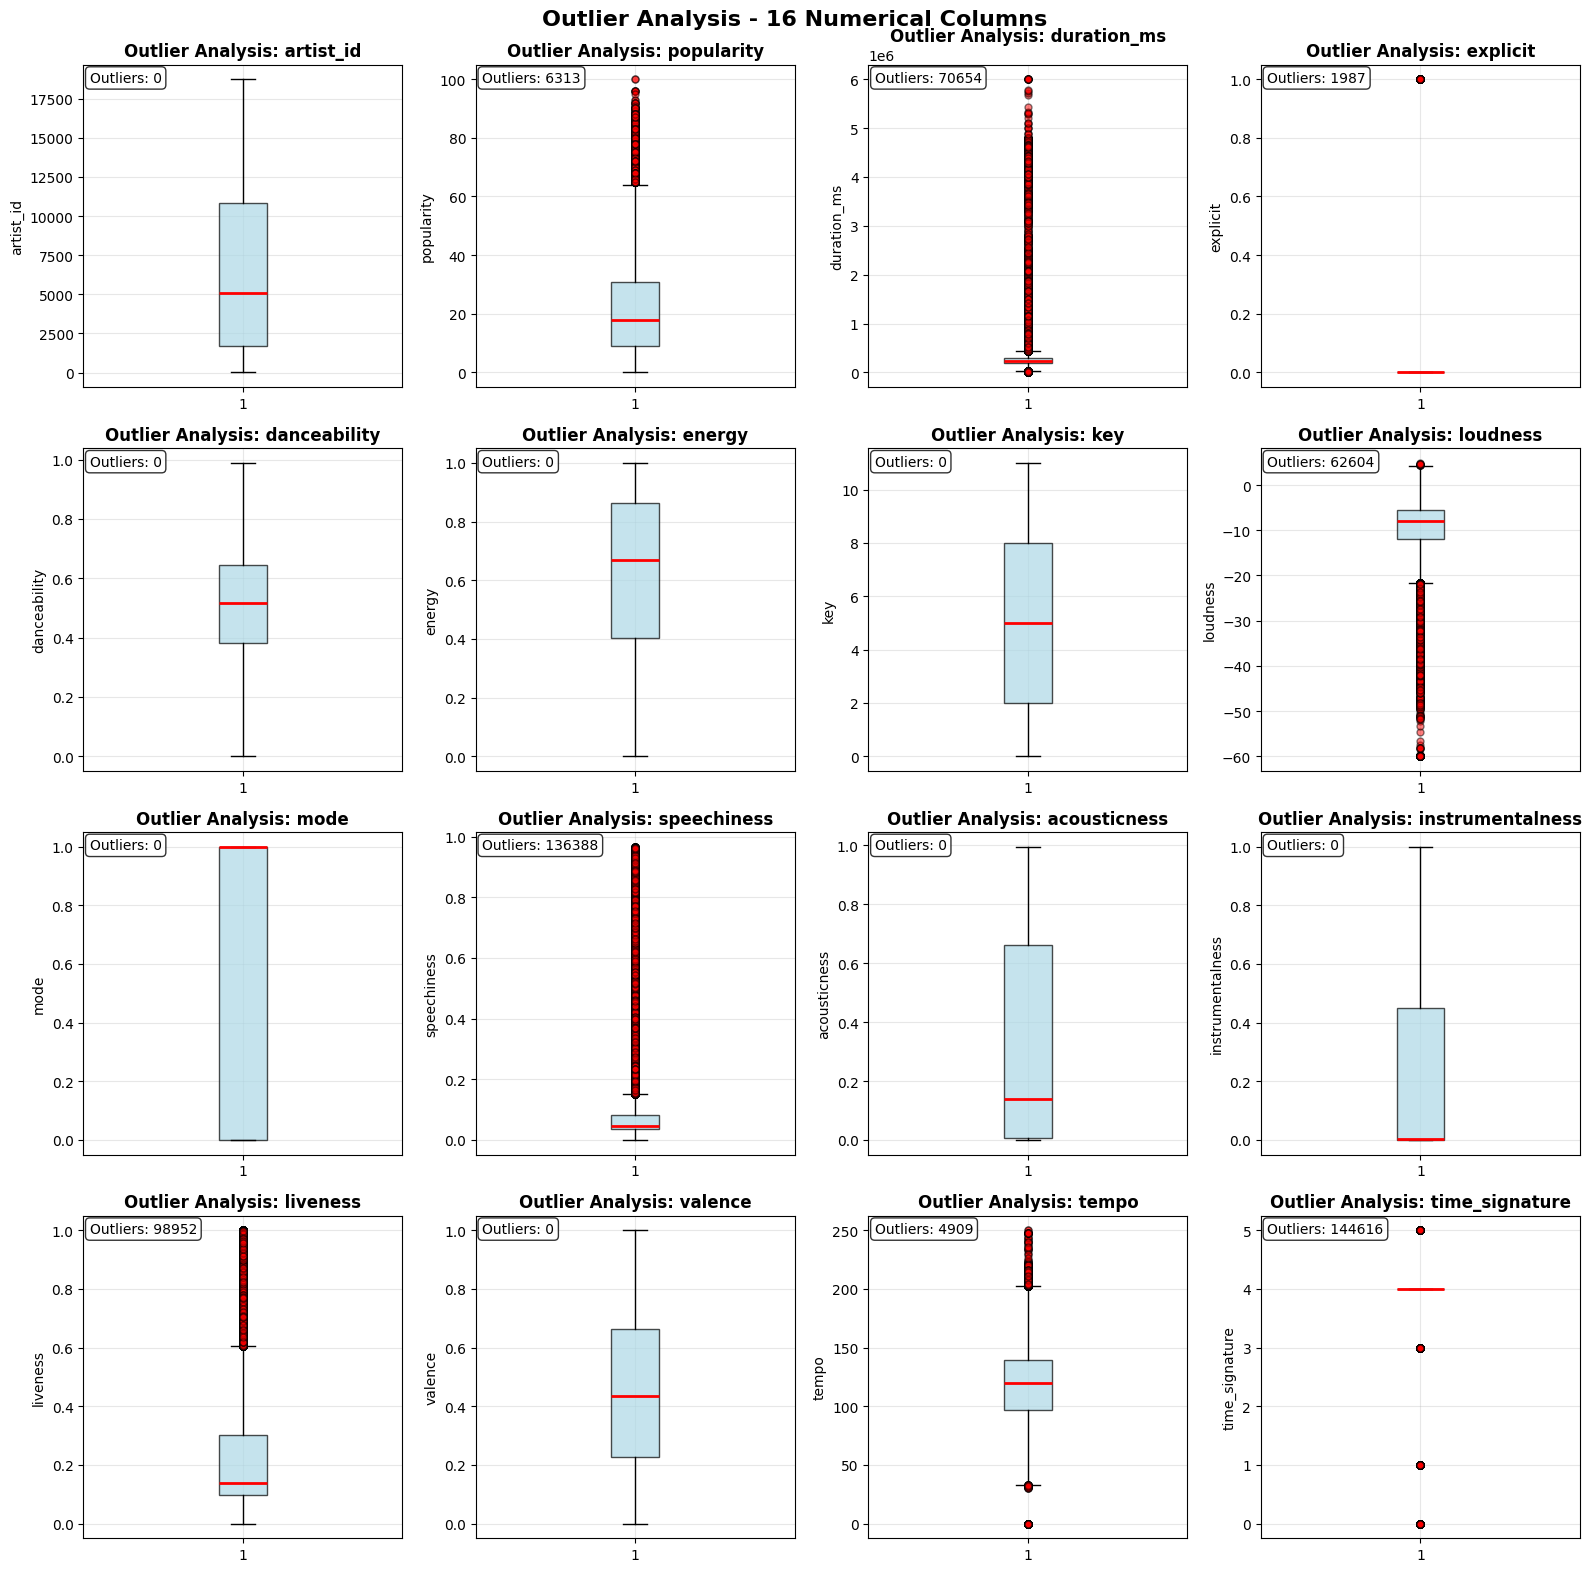

In [25]:
# Perform outlier analysis
outlier_fig = eda.outlier_analysis()
if outlier_fig:
    plt.show()
else:
    print("No numerical columns found for outlier analysis.")

In [26]:
# Generate comprehensive HTML report
html_generator = HTMLGenerator()

report_filename = "../output/spotify_music_eda_report.html"
report_title = "Spotify Music Dataset - EDA Report"

print(f"📄 Generating HTML report: {report_filename}")
print("⏳ This may take a few moments...")

try:
    report_path = html_generator.generate_report(
        eda_instance=eda,
        filename=report_filename,
        title=report_title
    )
    
    if report_path:
        print(f"✅ HTML report successfully generated: {report_path}")
        print(f"\n📊 The report contains:")
        print(f"   • Dataset overview and statistics")
        print(f"   • {len(eda.plots)} static visualizations") 
        print(f"   • Professional styling and layout")
        print(f"   • Table of contents for easy navigation")
        print(f"\n📂 Open '{report_filename}' in your browser to view the report!")
    else:
        print("❌ Failed to generate HTML report")
        
except Exception as e:
    print(f"❌ Error generating HTML report: {e}")
    print("💡 Note: HTML generation requires matplotlib figures to be closed properly")

📄 Generating HTML report: ../output/spotify_music_eda_report.html
⏳ This may take a few moments...
Generating HTML report: ../output/spotify_music_eda_report.html
HTML report generated successfully: ../output/spotify_music_eda_report.html
Report contains 5 static visualizations
✅ HTML report successfully generated: ../output/spotify_music_eda_report.html

📊 The report contains:
   • Dataset overview and statistics
   • 5 static visualizations
   • Professional styling and layout
   • Table of contents for easy navigation

📂 Open '../output/spotify_music_eda_report.html' in your browser to view the report!
